<a href="https://colab.research.google.com/github/AlbusDracoSam/Employee-Attrition-Prediction/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data and libraries

In [ ]:
!git clone https://github.com/AlbusDracoSam/Employee-Attrition-Prediction.git

fatal: destination path 'Employee-Attrition-Prediction' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Employee-Attrition-Prediction/train.csv")
data_copy = data
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,01-01-2016,1,28,Male,C23,Master,57387,24-12-2015,NaN,1,1,2381060,2
1,01-02-2016,1,28,Male,C23,Master,57387,24-12-2015,NaN,1,1,-665480,2
2,01-03-2016,1,28,Male,C23,Master,57387,24-12-2015,11-03-2016,1,1,0,2
3,01-11-2017,2,31,Male,C7,Master,67016,06-11-2017,NaN,2,2,0,1
4,01-12-2017,2,31,Male,C7,Master,67016,06-11-2017,NaN,2,2,0,1


# EDA

In [ ]:
#Checking the data types of the variables
data.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [ ]:
#Checking for null values
data.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

# Feature Engineering

In [ ]:
#Adding attrition variable 1 - Attrited, 0 - Non - attrited
data['attrition'] = np.where(data['LastWorkingDate'].isnull(), 0, 1)
#Male - 4, Female - 6
data['Gender'] = np.where(data['Gender'] == 'Male', 4, 6)
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition
0,01-01-2016,1,28,4,C23,Master,57387,24-12-2015,NaN,1,1,2381060,2,0
1,01-02-2016,1,28,4,C23,Master,57387,24-12-2015,NaN,1,1,-665480,2,0
2,01-03-2016,1,28,4,C23,Master,57387,24-12-2015,11-03-2016,1,1,0,2,1
3,01-11-2017,2,31,4,C7,Master,67016,06-11-2017,NaN,2,2,0,1,0
4,01-12-2017,2,31,4,C7,Master,67016,06-11-2017,NaN,2,2,0,1,0


In [ ]:
#College - 0, Bachelor - 1, Master - 2
for column in data['Education_Level']:
    if column == 'College':
        data['Education_level'] = 0
    elif column == 'Bachelor':
        data['Education_Level'] = 1
    elif column == 'Master':
        data['Education_level'] = 2

data['Attrition'] = data['attrition']
data = data.drop('attrition', axis =1)

In [ ]:
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Education_level,Attrition
0,01-01-2016,1,28,4,C23,1,57387,24-12-2015,NaN,1,1,2381060,2,2,0
1,01-02-2016,1,28,4,C23,1,57387,24-12-2015,NaN,1,1,-665480,2,2,0
2,01-03-2016,1,28,4,C23,1,57387,24-12-2015,11-03-2016,1,1,0,2,2,1
3,01-11-2017,2,31,4,C7,1,67016,06-11-2017,NaN,2,2,0,1,2,0
4,01-12-2017,2,31,4,C7,1,67016,06-11-2017,NaN,2,2,0,1,2,0


In [ ]:
#Number of attritions
print('Number of rows - ' + str(len(data)))
print('Number of attitions - '+str((data['Attrition'] == 1).sum()))
print('Number of Non-attritions - '+str((data['Attrition'] == 0).sum()))

Number of rows - 19104
Number of attitions - 1616
Number of Non-attritions - 17488


In [ ]:
#Percentage if just guessed
(17488-1616) / 17488

0.9075937785910339

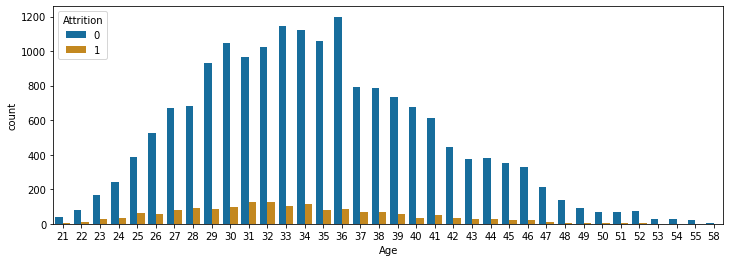

In [ ]:
plt.subplots(figsize = (12,4))
sns.countplot(x = 'Age', hue = 'Attrition', data = data, palette='colorblind')

In [ ]:
data['City'] = data['City'].astype(str)
data['City'] = data['City'].str[1:]
data['City'].unique()


array(['23', '7', '13', '9', '11', '2', '19', '26', '20', '17', '29',
       '10', '24', '14', '6', '28', '5', '18', '27', '15', '8', '25',
       '21', '1', '4', '3', '16', '22', '12'], dtype=object)

In [ ]:
#Correlation
data.corr()

,Emp_ID,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Education_level,Attrition
Emp_ID,1.000000,0.006652,0.030014,NaN,-0.035767,-0.035166,-0.025712,0.003896,0.017917,NaN,-0.000675
Age,0.006652,1.000000,0.040142,NaN,0.192225,-0.005726,0.211515,0.109426,0.172660,NaN,-0.063656
Gender,0.030014,0.040142,1.000000,NaN,0.013230,-0.050450,0.002521,0.008938,0.008069,NaN,-0.003356
Education_Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,-0.035767,0.192225,0.013230,NaN,1.000000,0.380878,0.778383,0.234044,0.116897,NaN,-0.100896
Joining Designation,-0.035166,-0.005726,-0.050450,NaN,0.380878,1.000000,0.559854,-0.044446,-0.237791,NaN,0.020249
Designation,-0.025712,0.211515,0.002521,NaN,0.778383,0.559854,1.000000,0.220955,0.014445,NaN,-0.089486
Total Business Value,0.003896,0.109426,0.008938,NaN,0.234044,-0.044446,0.220955,1.000000,0.471224,NaN,-0.142921
Quarterly Rating,0.017917,0.172660,0.008069,NaN,0.116897,-0.237791,0.014445,0.471224,1.000000,NaN,-0.260493
Education_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dropping unnecessary data
data = data.drop('Emp_ID', axis = 1)
data = data.drop('MMM-YY', axis = 1)
data = data.drop('Dateofjoining', axis = 1)
data = data.drop('LastWorkingDate', axis = 1)

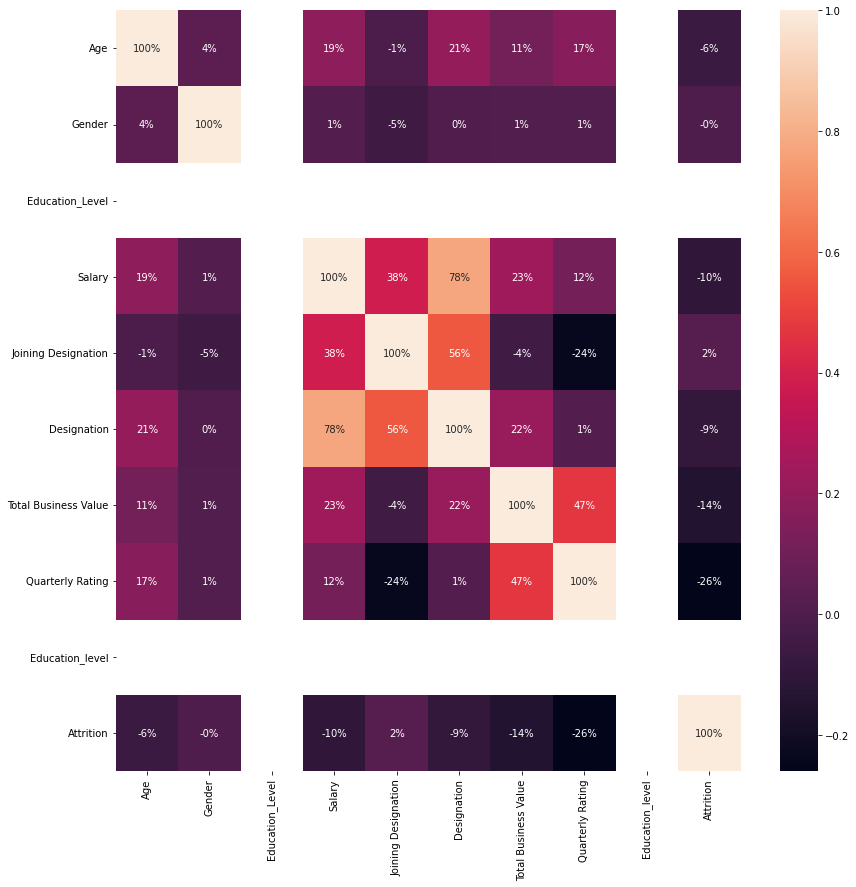

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot = True, fmt = '.0%')

In [ ]:
data

,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Education_level,Attrition
0,28,4,23,1,57387,1,1,2381060,2,2,0
1,28,4,23,1,57387,1,1,-665480,2,2,0
2,28,4,23,1,57387,1,1,0,2,2,1
3,31,4,7,1,67016,2,2,0,1,2,0
4,31,4,7,1,67016,2,2,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
19099,30,4,27,1,70254,2,2,740280,3,2,0
19100,30,4,27,1,70254,2,2,448370,3,2,0
19101,30,4,27,1,70254,2,2,0,2,2,0
19102,30,4,27,1,70254,2,2,200420,2,2,0


# Model Building

In [ ]:
#Splitting the data
X = data.iloc[:, 0:data.shape[1]-1].values
Y = data.iloc[:, -1].values

In [ ]:
#Splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#Score of the train
forest.score(X_train, Y_train)

0.9513539921831379

In [ ]:
#Accuracy on test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
print(cm)

[[4214  169]
 [ 371   22]]


In [ ]:
data['Emp_Id'] = data_copy['Emp_ID']
data.head()

,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Education_level,Attrition,Emp_Id
0,28,4,23,1,57387,1,1,2381060,2,2,0,1
1,28,4,23,1,57387,1,1,-665480,2,2,0,1
2,28,4,23,1,57387,1,1,0,2,2,1,1
3,31,4,7,1,67016,2,2,0,1,2,0,2
4,31,4,7,1,67016,2,2,0,1,2,0,2


# Writing Submission file

In [ ]:
data_test = pd.read_csv("Employee-Attrition-Prediction/test.csv")

In [ ]:
data_test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [ ]:
#Converting to STR for easier searching
data_test.Emp_ID = data_test.Emp_ID.astype(str)
data.Emp_Id = data.Emp_Id.astype(str)
for row in data['Emp_Id']:
    if data_test['Emp_ID'].str.contains(row).any():
        data_test['Target'] = data['Attrition']

In [ ]:
data_test.head(10)

,Emp_ID,Target
0,394,0
1,173,0
2,1090,1
3,840,0
4,308,0
5,1864,0
6,1606,0
7,954,0
8,2422,0
9,1841,1


In [ ]:
print('Number of rows - ' + str(len(data)))
print('Number of attitions - '+str((data_test['Target'] == 1).sum()))
print('Number of Non-attritions - '+str((data_test['Target'] == 0).sum()))

Number of rows - 19104
Number of attitions - 62
Number of Non-attritions - 679


In [ ]:
data_test.to_csv("./sumission.csv")